# BusFreq Parameters

This notebook aims to show how the parameters will impact the measured frequency from model ``BusFreq``.

In [1]:
import andes

import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
ss = andes.load(andes.get_case("ieee14/ieee14_full.xlsx"),
                verbose=30, setup=False, no_output=True)

ss.add("Toggle", dict(model='SynGen', dev="GENROU_2", t=1.0))

busf_dict = {
    'default': {'Tf': 0.02, 'Tw': 0.02},
    'set1': {'Tf': 0.02, 'Tw': 0.05},
    'set2': {'Tf': 0.02, 'Tw': 0.1},
}

for key, val in busf_dict.items():
    ss.add("BusFreq", dict(idx=key, bus=6, **val))

ss.setup()

True

In [4]:
ss.PFlow.run()

ss.TDS.config.criteria = 0
ss.TDS.config.no_tqdm = True

ss.TDS.run()

<Toggle Toggle_1>: SynGen.GENROU_2 status changed to 0 at t=1.0 sec.


True

In [5]:
Tf = ss.BusFreq.get(src='Tf', attr='v', idx=list(busf_dict.keys()))
Tw = ss.BusFreq.get(src='Tw', attr='v', idx=list(busf_dict.keys()))
yheaders = [f'Tf={Tfi}, Tw={Twi}' for Tfi, Twi in zip(Tf, Tw)]

(<Figure size 800x500 with 1 Axes>,
 <Axes: xlabel='Time [s]', ylabel='Bus Freq. [Hz]'>)

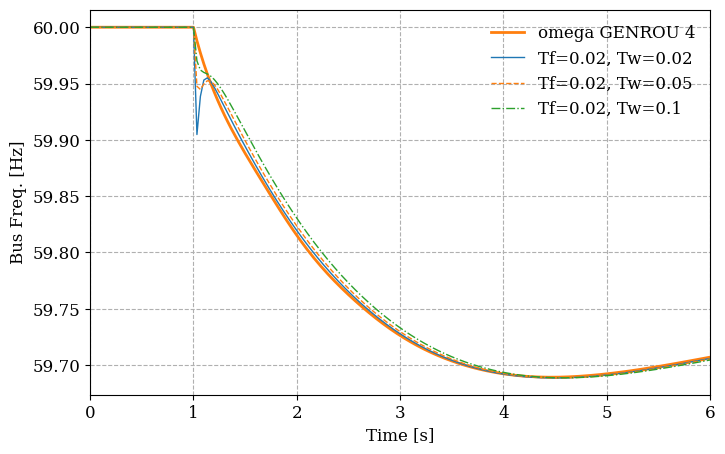

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5), dpi=100)
right = 6
ss.TDS.plt.plot(ss.GENROU.omega,
                a=(3),
                ytimes=ss.config.freq,
                ylabel='Freq. [Hz]', color='tab:orange',
                line_width=2,
                show=False, grid=True,
                latex=False,
                ax=ax, fig=fig, right=right)
ss.TDS.plt.plot(ss.BusFreq.f,
                a=ss.BusFreq.idx2uid(list(busf_dict.keys())),
                ytimes=ss.config.freq,
                ylabel='Bus Freq. [Hz]',
                show=False,
                latex=False,
                ax=ax, fig=fig, right=right,
                yheader=yheaders)